## KPCA - Kernel Principal Component Analysis
Many machine learning algorithms make assumpiton about the linear separability of the input data. We learn that the perceptron even requires perfectly linealry separable trianing data to converge, Other algorithms that we have convered so far assume that the lack of perfect linear separbility is due to noise:__Adaline, logistic regression, and the (standard)SVM to just name a few.__
- In dealing with nonlinear problems, linear transformation techniques for dimensionality reduction, such as PCA and LDA, may not be the best choice.

<font style="color:blue">__Using kernel PCA, we will learn how to transform data that is not linearly separable onto a new, lower-dimensional subspace that is suitable for linear classifiers</font>__

![](kpca.png)

### Following three steps to implement and RBF kernel PCA:

1. We compute the __kernel (similarity)__ matrix __K__, where we need to calculate the following:
<center>$K(x^{(i)}, x^{(j)}) = exp \left( - \gamma ||x^{(i)} - x^{(j)}  ||\right)$</center>
<br>
We do the this for each pair fo samples :
<center> $$K =\begin{bmatrix} K(x^{(1)}, x^{(1)}) & K(x^{(1)}, x^{(2)})& ... & K(x^{(1)}, x^{(n)}) \\ K(x^{(2)}, x^{(1)}) & K(x^{(2)}, x^{(2)}) & ... & K(x^{(2)}, x^{(n)}) \\ . & . & . &.  \\  . & . & . & .  \\ . & . & . & .  \\K(x^{(n)}, x^{(1)}) & K(x^{(n)}, x^{(2)}) & ... & K(x^{(n)}, x^{(n)}) \end{bmatrix}$$</center>
<br>
For example, if our dataset contains __100 trianing samples, the symmetirc kernel matrix of the pariwise similarities would be 100 x 100-dimensional.__
2. We center the kernel matrix __K__ using the followign requiatons:
<center>$K^` = K - I_nK - KI_n + I_nKI_n$</center>
<br>
Here, $I_n$ is an _n x n-dimensional_ matrix ( the same dimensions as the kernel matrix) where all the values are equal to $\frac{1}{n}$

3. We collect the top __K__ eignevector of the __centered kernel matix__ based on their corresponding eigenvalues, which are ranked by decreasing magnitude, __<font style="color:red">In contrast to standard PCA, the eigenvectors are not the principal component axes, but the samples already projected on to the axes</font>__

#### Why we need o the center the kernel matrix in the seond step?
- We previously assumed that we are working with standarized data, where all featues have mean zero when we formulated the covariance matrix and replaced the dot-products with the nonlinear feature combinations via $\phi$. Thus the centering of the kernel matrix in the second step becomes necessary, __since we do not compute the new feature space explicitly so that we cannot guarantee that the new feature space is also centered at zero.__


__Note: Implemented KPCA in Rbf_kernel_PCA.py . Importing down below__

In [1]:
from Rbf_kernel_PCA import rbf_kernel_pca

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

- One downside of KPCA for dimensionality reduction is that we have to specify the $\gamma$ parameter a priori. Finding an appropriate value for $\gamma$ requires experimentation and is best done using algorithms for parameter tuning,

- Let's apply __rbf_kernel_pca__ on non-linear datsets.

### Example 1 -- Separating half-moon shapes.


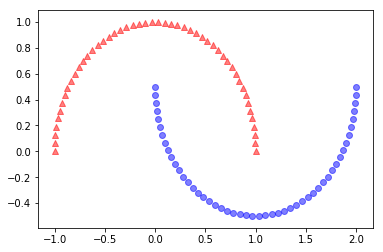

In [3]:
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=100, random_state=123)
plt.scatter(X[y==0,0], X[y==0,1], color='red', marker='^', alpha=0.5)
plt.scatter(X[y==1,0], X[y==1,1], color='blue', marker='o', alpha=0.5)
plt.show()

Clearly, these two half-moon shapes are not linearly separable and our goal is to _unfold_ the half-moons via kernel PCA so that the dataset can serve as a suitable input for a linear classifier. <br>
But first, let's see how the dataset looks if we project it onto the principal components via standard PCA.

In [4]:
from sklearn.decomposition import PCA
scikit_pca = PCA(n_components =2)
X_spca = scikit_pca.fit_transform(X)

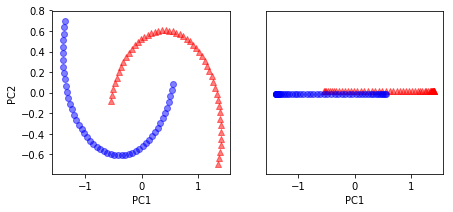

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7,3))
ax[0].scatter(X_spca[y==0,0], X_spca[y==0,1], color='red', marker='^', alpha=0.5)
ax[0].scatter(X_spca[y==1,0], X_spca[y==1,1], color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_spca[y==0,0], np.zeros((50,1)) + 0.02, color='red', marker='^', alpha=0.5)
ax[1].scatter(X_spca[y==1,0], np.zeros((50,1)) - 0.02, color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1,1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.show()


<br>
Now __let's try our Kernel PCA funciton __

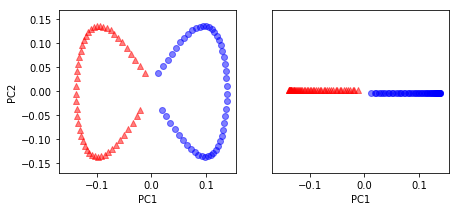

In [7]:
X_kpca = rbf_kernel_pca(X, gamma=15, n_components=2)[0]
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7,3))
ax[0].scatter(X_kpca[y==0,0], X_kpca[y==0,1], color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y==1,0], X_kpca[y==1,1], color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_kpca[y==0,0], np.zeros((50,1)) + 0.02, color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y==1,0], np.zeros((50,1)) - 0.02, color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1,1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.show()

- WE can see that the two classes(circles and triangels) are linearly well seprated so that it becomes a suitable trianing dataset for linear classifiers.<br>
- <font style="color:#dd22e3">Unfortunately, there is no universal value for the __tuning parameter $\gamma$__ that works well for different datasets. Finding a $\gamma$ value that is appropriate for a given problem requires experimentation. </font>

### Example 2 -- Separating Concentric circles


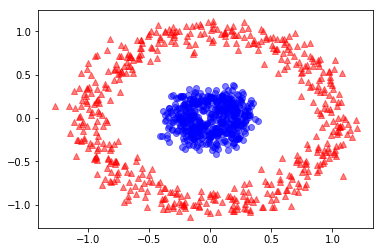

In [8]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples = 1000, random_state=123, noise=0.1, factor = 0.2)

plt.scatter(X[y==0,0], X[y==0,1], color='red', marker='^', alpha=0.5)
plt.scatter(X[y==1,0], X[y==1,1], color='blue', marker='o', alpha=0.5)
plt.show()

- Let's start with the standard PCA approach to compare ti ot the results of the RBF kernel PCA:

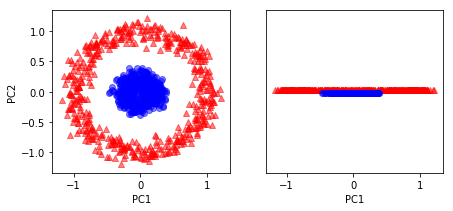

In [9]:
scikit_pca = PCA(n_components =2)
X_spca = scikit_pca.fit_transform(X)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7,3))
ax[0].scatter(X_spca[y==0,0], X_spca[y==0,1], color='red', marker='^', alpha=0.5)
ax[0].scatter(X_spca[y==1,0], X_spca[y==1,1], color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_spca[y==0,0], np.zeros((500,1)) + 0.02, color='red', marker='^', alpha=0.5)
ax[1].scatter(X_spca[y==1,0], np.zeros((500,1)) - 0.02, color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1,1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.show()


<br>
Now __let's try our Kernel PCA funciton __

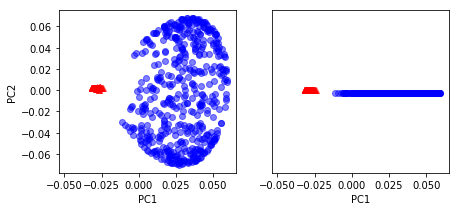

In [10]:
X_kpca = rbf_kernel_pca(X, gamma=15, n_components=2)[0]
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7,3))
ax[0].scatter(X_kpca[y==0,0], X_kpca[y==0,1], color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y==1,0], X_kpca[y==1,1], color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_kpca[y==0,0], np.zeros((500,1)) + 0.02, color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y==1,0], np.zeros((500,1)) - 0.02, color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1,1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.show()

### Projecting new data Points

In real application, we have more than one dataset that we want to transform , for example __training and test data, also new samples__ that we collect after the model building and evaluation.

--<br>
As we remember the __Standard PCA__ approach at the beginning of the chapter we project data by calculating the dot product between a transformation matrix and the input samples; the columns of the projeciton matrix are the top __k__ eigenvectors (__v__) that we obtained form the covariance matrix.<br>

--<br>
Now, the __question__ is how we tranform this concept to __kernel PCA__? <br>
If, we think back on the idea of __KPCA__, we remember that we obtained an eigenvector (__a__) of the centered kernel matrix (_not the covariance matrix_), which means that those are the samples that are already projected onto the principal component axis __v__.<br>

- Thus, if we want to project a new sample  $ x^` $  on this principal component axis, we'd need to compute the following:
<center> $ \phi(x^`)^Tv $</center><br>

Fortunately, we can use the kernel trick so that we don't have to calucate the projections $\phi(x^`)^Tv$ explicity.
However it is worth noting that KPCA , in contrast to standard PCA, is a __memory-based method__, which means that we have to re-use the original trianing set each time to project new samples.<br>

- We have to calculate the pariwise ___RBF kernel (similarity) between each $i^{th}$ sample in the training dataset and the new sample___ $x^`$:<br>
<center> $\phi(x^`)^Tv = \sum_i a^{(i)} \phi(x^`)^T \phi(x^{(i)}) $</center>
<center> $\phi(x^`)^Tv = \sum_i a^{(i)} k(x^` , x^{(i)}) $</center>


<center></center>

- Here , the eigenvector __a__ and the eigenvalues $\lambda$ of the kernel matrix __K__ satisfy the following conditions in the equation:
<center>$Ka = \lambda a$</center>

Now, let's create anew half-mmon dtaset and project it onto a one-dimensional subspace using the updated RBF kernel PCA implementation:

In [26]:
X, y = make_moons(n_samples=100, random_state=123)
alphas, lambdas = rbf_kernel_pca(X, gamma=15, n_components= 1)

To make sure that we implemented the code for projecting new samples, let us assume that the 26th point from the half-moon dataset is a new data point $x^`$, and our task is to project it onto this new subspace:

In [27]:
X_new = X[25]
print(X_new)

X_proj = alphas[25] # original projection
print(X_proj)

def project_x(x_new, X, gamma, alphas, lambdas):
    pair_dist = np.array([np.sum((x_new - row)**2) for row in X])
    k = np.exp(-gamma * pair_dist)
    return k.dot(alphas/lambdas)

[ 1.8713187   0.00928245]
[ 0.07877284]


In [28]:
# print(X_new)
X_reproj = project_x(X_new, X, gamma=15, alphas=alphas, lambdas=lambdas)
print(X_reproj)

[ 0.07877284]


Let's visualize the projection on the first principal component:
- We can now also see in the following scatterplot, we mapped the sample $x^`$ onto the first principal component correctly:

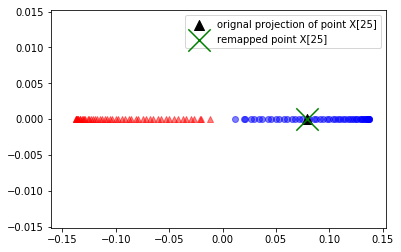

In [30]:
plt.scatter(alphas[y==0,0], np.zeros((50)), color='red', marker='^', alpha=0.5)
plt.scatter(alphas[y==1,0], np.zeros((50)), color='blue', marker='o', alpha=0.5)
plt.scatter(X_proj, 0, color='black', label='orignal projection of point X[25]', marker='^', s=100)
plt.scatter(X_reproj, 0, color='green', label='remapped point X[25]', marker='x', s=500)
plt.legend(scatterpoints=1)
plt.show()

## Kernel Principal Component analysis in scikit-learn
Usage is similar to standar PCA class, and we can specify the kernel via the kernel parameter

In [31]:
from sklearn.decomposition import KernelPCA
X, y = make_moons(n_samples=100, random_state=123)
scikit_pca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
X_skernpca = scikit_pca.fit_transform(X)


To check that we get results that are consistent with our own kernel PCA implementation, let's plot the transformed half-moon shape data onto the first principal components

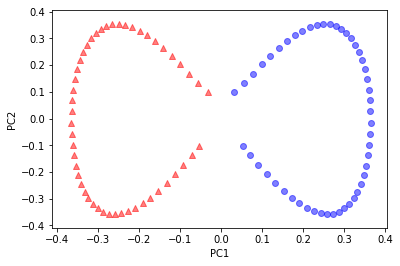

In [35]:
plt.scatter(X_skernpca[y==0, 0], X_skernpca[y==0, 1], color='red', marker='^', alpha= 0.5)
plt.scatter(X_skernpca[y==1, 0], X_skernpca[y==1, 1], color='blue', marker='o', alpha= 0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()